In [1]:
from math import sqrt
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("sticks")

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

In [ ]:
def  brownian ( x0 ,m,  n , sigma):
    x = np.zeros((m,n))
    x[:,:] = x0
    for j in range(1,m):
        for k in range(1,n):
            x[j,k] = x[j,k-1] + norm.rvs(scale=sigma)
    return x

In [ ]:
x = brownian(0,20,1000,0.01)
for j in range(1,20):
    plt.plot(x[j,:])

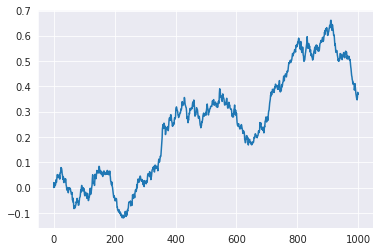

In [4]:
plt.plot(x[4,:])

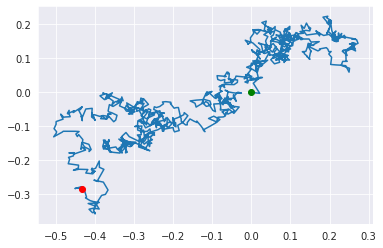

In [5]:
plt.plot(x[1,:],x[2,:])
plt.plot(x[1,0],x[2,0], 'go')
plt.plot(x[1,-1], x[2,-1], 'ro')

In [6]:
seed = 5
N = 100

In [7]:
def brownian(seed,N):
    np.random.seed(seed)
    dt=1/N
    b = np.random.normal(0,1,int(N))*np.sqrt(dt)
    W = np.cumsum(b)
    return W,b

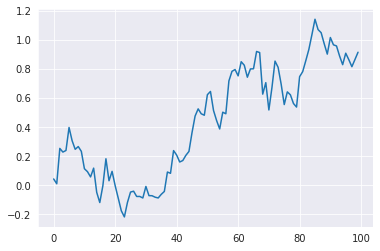

In [8]:
W,b = brownian(seed,N)
plt.plot(W)

(array([  5.,  32., 125., 348., 520., 517., 328.,  96.,  25.,   4.]),
 array([-3.50747462, -2.7954953 , -2.08351599, -1.37153668, -0.65955737,
         0.05242195,  0.76440126,  1.47638057,  2.18835989,  2.9003392 ,
         3.61231851]),
 <a list of 10 Patch objects>)

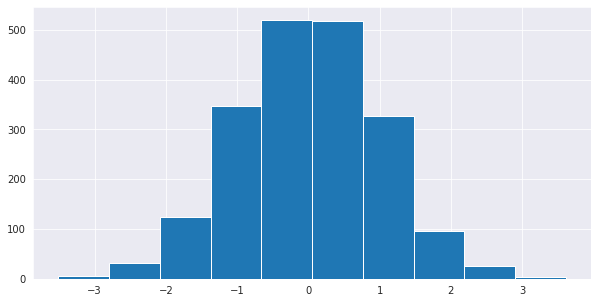

In [9]:
W  = np.random.normal(0,1,2000)
plt.figure(figsize=(10,5))
plt.hist(W)

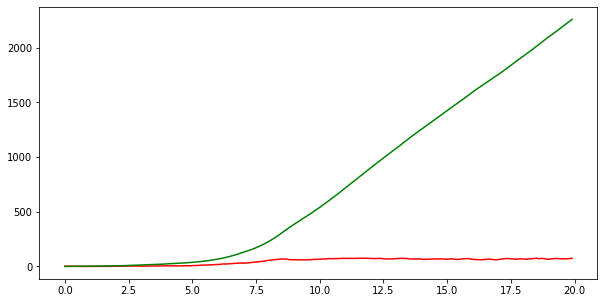

In [14]:
def simulation_SDE(N=100,beta=1,gamma=0.25,b=0,dt=0.1,temps=200,i0=2): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps)) 
    R = np.zeros((temps))
    I[0] = i0
    R[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1): 
        S[i+1] = S[i] + (beta*S[i]*I[i]/N)
        mu = ((beta/N)*I[i]*(N-I[i])) - (gamma*I[i])
        sigma = np.sqrt(((beta/N)*I[i]*(N-I[i])) + (gamma*I[i]))*np.random.randn()                   
        I[i+1] = I[i] + (mu*dt)+(sigma*np.sqrt(dt))
        R[i+1] = R[i] + ((b+gamma)*I[i])
        t[i+1] = t[i] + dt          
        Y[i+1] = Y[i] + ((beta/N)*Y[i]*(N-Y[i])) - ((b+gamma)*Y[i])
        i += 1
    return t,S,I,R
t,S,I,R = simulation_SDE()
plt.figure(figsize=(10,5))
plt.plot(t,I,c='red')
plt.plot(t,R,c='green')

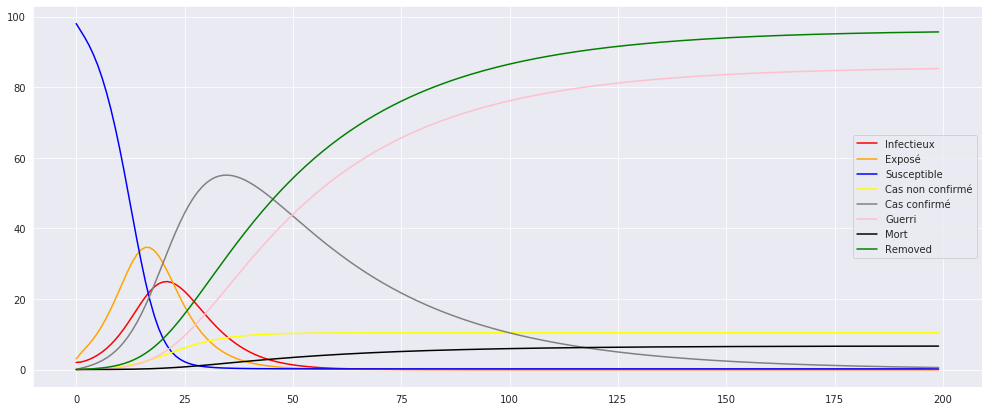

In [18]:
def simulation_EDO(N=100,p=0.2, q=0.9,alpha=1, beta=0.15, gamma=0.09, lamda=0.20, theta=0.03, delta=0.021,dt=1,temps=200,i0=2): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    E = np.zeros((temps))
    I = np.zeros((temps)) 
    NC = np.zeros((temps))
    R = np.zeros((temps))
    G = np.zeros((temps))
    D = np.zeros((temps))
    C = np.zeros((temps))
    S[0] = 98 
    E[0] = 3
    I[0] = i0
    NC[0] = 0
    C[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1):  
        S[i+1] = S[i] - (alpha*S[i]*I[i]/N)  
        E[i+1] = E[i] + (alpha*S[i]*I[i]/N - beta*E[i]) 
        I[i+1] = I[i] + ((beta*E[i]) - (p*gamma*I[i])- ((1-p)*lamda*I[i])) 
        NC[i+1] = NC[i] + (p*gamma*I[i]) 
        C[i+1] = C[i] + ((1-p)*lamda*I[i]) - ((1-q)* delta*C[i]) - (q*theta*C[i])  
        G[i+1] = G[i] + (q*theta*C[i])
        D[i+1] = D[i] + ((1-q)* delta*C[i])
        R[i+1] = G[i+1] + NC[i+1]
        t[i+1] = t[i] + dt          
        i += 1
    return t,S,E,I,NC,C,G,D,R
t,S,E,I,NC,C,G,D,R = simulation_EDO()
plt.figure(figsize=(17,7))
plt.plot(t,I,c='red',label='Infectieux')
plt.plot(t,E,c='orange',label='Exposé')
plt.plot(t,S,c='blue',label='Susceptible')
plt.plot(t,NC,c='yellow',label='Cas non confirmé')
plt.plot(t,C,c='grey',label='Cas confirmé')
plt.plot(t,G,c='pink',label='Guerri')
plt.plot(t,D,c='black',label='Mort')
plt.plot(t,R,c='green',label='Removed')
plt.legend()

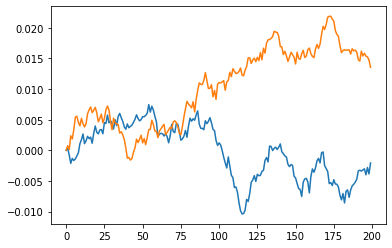

In [8]:
def  brownian ( x0 , n ,  dt ,  delta):
    x = np.zeros((n))
    x[0] = x0
    # Iterate to compute the steps of the Brownian motion.
    for k in range(1,n):
        x[k] = x[k-1] + norm.rvs(scale=delta**2*dt)
    return x
B = brownian(0,200,0.1,0.1)
B1 = brownian(0,200,0.1,0.1)
plt.plot(B)
plt.plot(B1)
plt.savefig('Brownian.jpg')

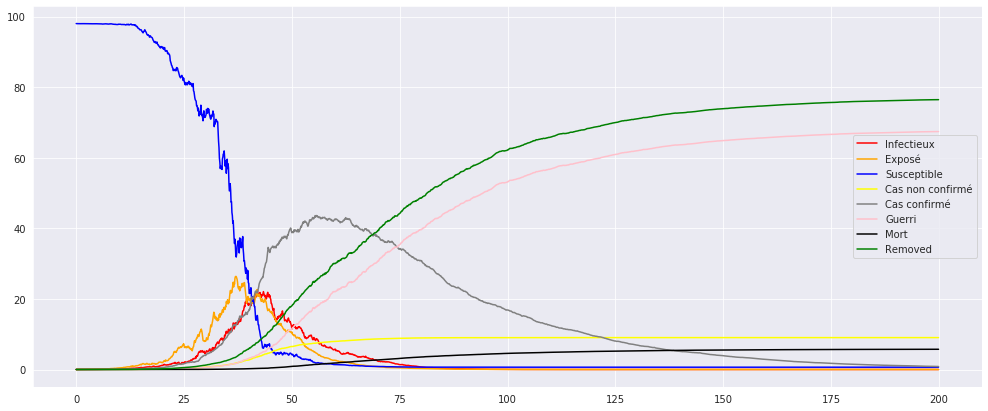

In [36]:
def simulation_EDS(N=100,p=0.2, q=0.9, beta=0.15, gamma=0.09, lamda=0.20, theta=0.03, delta=0.021,dt=0.1,temps=2000,i0=0.02): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    E = np.zeros((temps))
    I = np.zeros((temps)) 
    NC = np.zeros((temps))
    R = np.zeros((temps))
    G = np.zeros((temps))
    D = np.zeros((temps))
    C = np.zeros((temps))
    alpha = brownian(1,temps,0.1,0.1)
    S[0] = 98 
    E[0] = 0
    I[0] = i0
    NC[0] = 0
    C[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1):  
        S[i+1] = S[i] - (alpha[i]*S[i]*I[i]/N)*dt + (alpha[i]*S[i]*I[i]/N)*np.random.randn()*sqrt(dt)
        E[i+1] = E[i] + (alpha[i]*S[i]*I[i]/N - beta*E[i])*dt + (alpha[i]*S[i]*I[i]/N + beta*E[i])*np.random.randn()*dt  
        I[i+1] = I[i] + ((beta*E[i]) - (p*gamma*I[i])- ((1-p)*lamda*I[i]))*dt + ((beta*E[i])+(p*gamma*I[i])+((1-p)*lamda*I[i]))*np.random.randn()*dt 
        NC[i+1] = NC[i] + (p*gamma*I[i])*dt + (p*gamma*I[i])*np.random.randn()*dt
        C[i+1] = C[i] + (((1-p)*lamda*I[i]) - ((1-q)* delta*C[i]) - (q*theta*C[i]))*dt + (((1-p)*lamda*I[i])+((1-q)* delta*C[i])+(q*theta*C[i]))*np.random.randn()*dt 
        G[i+1] = G[i] + (q*theta*C[i])*dt + (q*theta*C[i])*np.random.randn()*dt
        D[i+1] = D[i] + ((1-q)* delta*C[i])*dt + ((1-q)* delta*C[i])*np.random.randn()*dt
        R[i+1] = G[i+1] + NC[i+1]
        t[i+1] = t[i] + dt          
        i += 1
    return t,S,E,I,NC,C,G,D,R
t1,S1,E1,I1,NC1,C1,G1,D1,R1 = simulation_EDS()
plt.figure(figsize=(17,7))
plt.plot(t1,I1,c='red',label='Infectieux')
plt.plot(t1,E1,c='orange',label='Exposé')
plt.plot(t1,S1,c='blue',label='Susceptible')
plt.plot(t1,NC1,c='yellow',label='Cas non confirmé')
plt.plot(t1,C1,c='grey',label='Cas confirmé')
plt.plot(t1,G1,c='pink',label='Guerri')
plt.plot(t1,D1,c='black',label='Mort')
plt.plot(t1,R1,c='green',label='Removed')
plt.legend()
plt.savefig("eds.pdf")

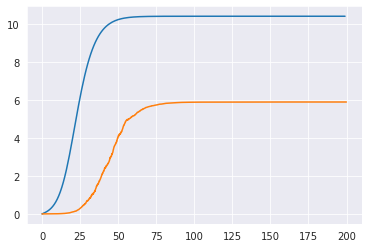

In [32]:
plt.plot(t,NC)
plt.plot(t1,NC1)

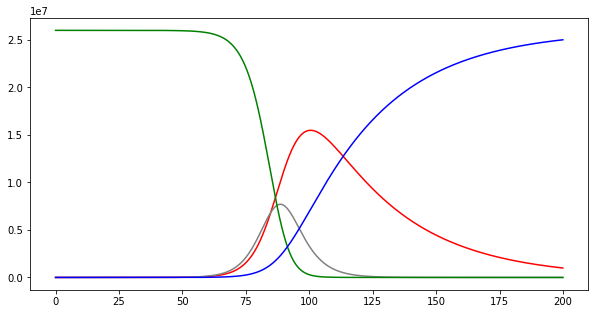

In [8]:
def simulation_SIER(N=26000000,alpha = 0.5,beta=0.15,gamma=0.03,dt=0.1,temps=2000,i0=2): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    E = np.zeros((temps))
    I = np.zeros((temps)) 
    R = np.zeros((temps))
    E[0] = 0
    I[0] = i0
    S[0] = N - i0 
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1): 
        S[i+1] = S[i] - (alpha*S[i]*I[i]/N)*dt 
        E[i+1] = E[i] + (alpha*S[i]*I[i]/N - beta*E[i])*dt 
        I[i+1] = I[i] + (beta*E[i]-gamma*I[i])*dt 
        R[i+1] = R[i] + (gamma*I[i])*dt 
        t[i+1] = t[i] + dt          
        i += 1
    return t,S,E,I,R
t,S1,E1,I1,R1 = simulation_SIER()
plt.figure(figsize=(10,5))
plt.plot(t,I1,c='red')
plt.plot(t,E1,c='grey')
plt.plot(t,S1,c='green')
plt.plot(t,R1,c='blue')

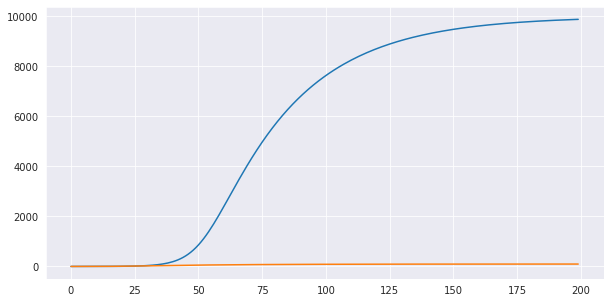

In [17]:
plt.figure(figsize=(10,5))
plt.plot(t,R1)
plt.plot(R)

In [24]:
A = np.array(([1,-2,3],[-2,5,3],[1,-2,3]))
np.linalg.cholesky(A)

array([[ 1.        ,  0.        ,  0.        ],
       [-2.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  1.41421356]])

In [79]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [6]:
11.57/0.15+11.5

88.63333333333334